# Polynomial Prediction
 
 Given a polynomial $2x^3 - x^2 + x - 5$, plot the function with Gaussian noise. Use Chi-Squared, MLE, and TensorFlow to predict the polynomial equation and integration to assess accuracy
 

## Graphing Polynomial

A graph of the function $2x^3 - x^2 + x - 5$ with no sigma. For comparison purposes


Area under true polynomial (Trapezoidal Method): -10.673469387755102
Area under true polynomial (Simpsons Method): -10.666666666666668


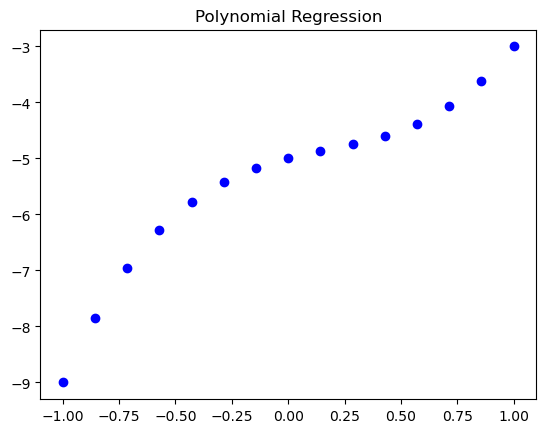

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import trapz
from scipy.integrate import simps

def f(x):
    return 2*(x**3) - (x**2) + x - 5

x_values = np.linspace(start = -1, stop = 1, num = 15)

y_pred = f(x_values) # exact based on the polynomial

plt.scatter(x_values, y_pred, color = 'blue')
plt.title("Polynomial Regression")

trapz_true = trapz(y = y_pred, x = x_values)
simps_true = simps(y = y_pred, x = x_values)

print(f"Area under true polynomial (Trapezoidal Method): {trapz_true}")
print(f"Area under true polynomial (Simpsons Method): {simps_true}")


## Chi Squared Regression

Best-fit parameters (Chi-Squared Minimization): [ 2.11990092 -0.97099523  0.97390599 -4.99138031]
Area estimation using Simpson's method: -10.683403435068534
Area estimation using Trapezoidal method: -10.645647590749663


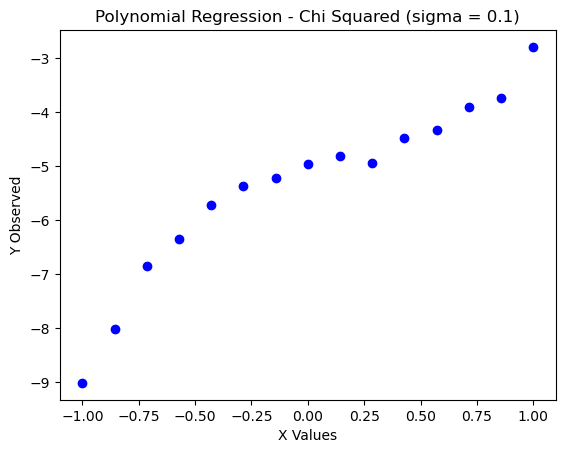

Best-fit parameters (Chi-Squared Minimization): [ 2.20310622 -1.37132149  0.89262182 -4.88145757]
Area estimation using Simpson's method: -10.731145961381216
Area estimation using Trapezoidal method: -10.678554080150201


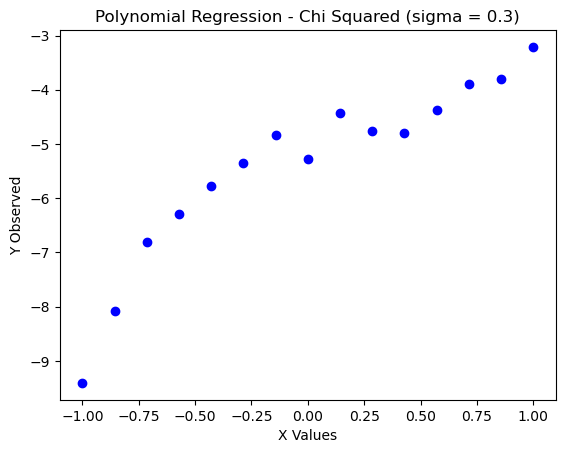

Best-fit parameters (Chi-Squared Minimization): [ 2.13580763 -1.51734604  0.9781547  -4.95738343]
Area estimation using Simpson's method: -11.085230456531194
Area estimation using Trapezoidal method: -10.96528677841313


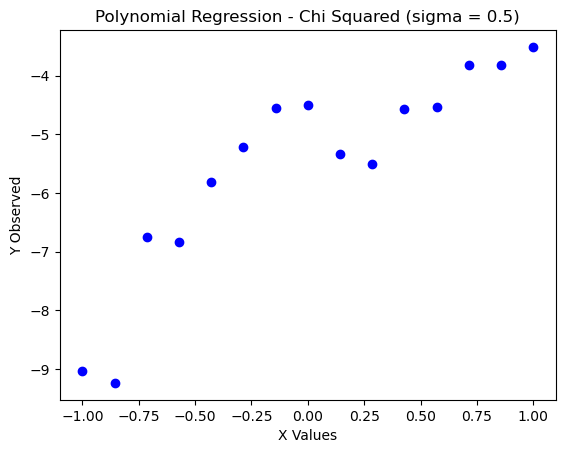

Best-fit parameters (Chi-Squared Minimization): [ 1.40260096 -0.46608794  1.03495253 -5.21090898]
Area estimation using Simpson's method: -10.92849548154696
Area estimation using Trapezoidal method: -10.753008682027971


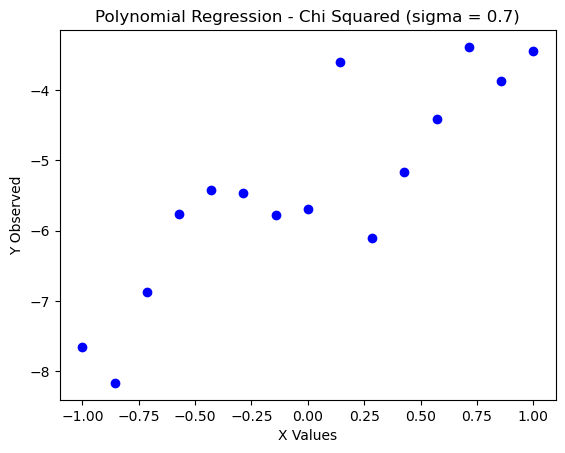

Best-fit parameters (Chi-Squared Minimization): [ 2.31959879 -0.5793806   0.80096969 -5.43331229]
Area estimation using Simpson's method: -10.969037145167633
Area estimation using Trapezoidal method: -11.223148962192635


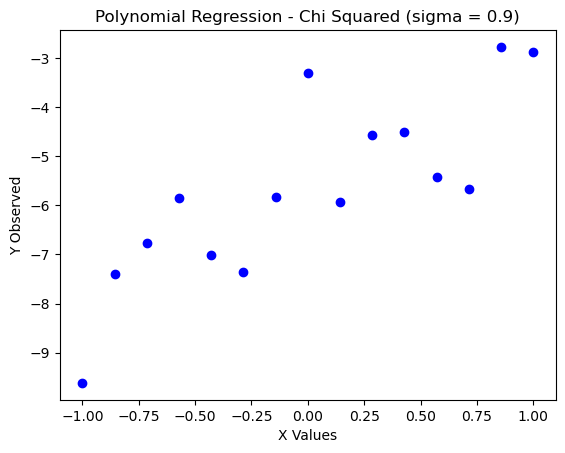

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
from scipy.integrate import simps
from scipy.integrate import trapz


## arrays to hold area
chi_sq_simps = np.zeros(5)
chi_sq_trapz = np.zeros(5)


# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    # Create a PolynomialRegressionChiSquared object
    chi_sq = PolynomialRegressionChiSquared(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(chi_sq.x_values, chi_sq.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - Chi Squared (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # Minimize the chi-squared
    try:
        chi_sq.minimize_chi_square()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing chi square for sigma = {sigma}: {e}")
    
    # Integration using Simpson's Rule
    chi_sq_simps[i] = simps(chi_sq.y_observed, chi_sq.x_values)
    print(f"Area estimation using Simpson's method: {chi_sq_simps[i]}")
    
    # Integration using Trapezoidal Rule
    chi_sq_trapz[i] = trapz(chi_sq.y_observed, chi_sq.x_values)
    print(f"Area estimation using Trapezoidal method: {chi_sq_trapz[i]}")

    # Show the plot inline
    plt.show()

## MLE 

Best-fit parameters (MLE): [ 1.86121118 -0.94531974  1.05625403 -5.05450964]
Area estimation using Simpson's method: -10.759339523012162
Area estimation using Trapezoidal method: -10.758176450806532


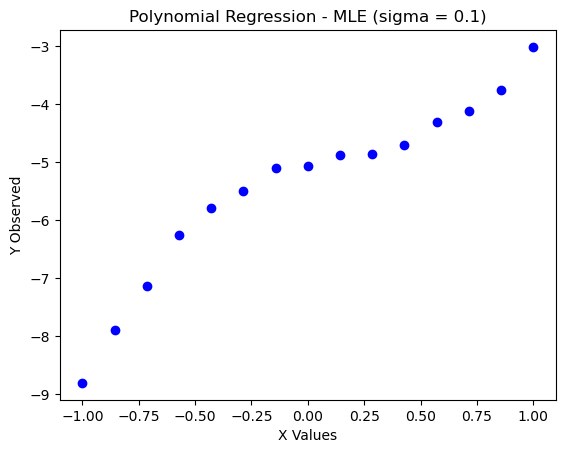

Best-fit parameters (MLE): [ 2.20783875 -0.82146145  0.83380284 -4.96586237]
Area estimation using Simpson's method: -10.437284248178246
Area estimation using Trapezoidal method: -10.485858984439318


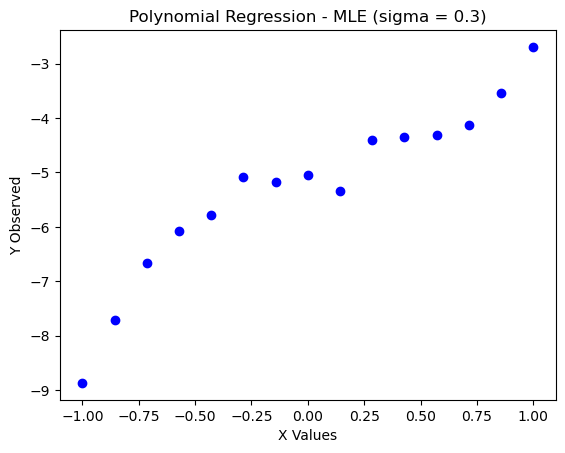

Best-fit parameters (MLE): [ 2.36687716 -0.75935819  0.48840123 -5.31358442]
Area estimation using Simpson's method: -11.18555451285521
Area estimation using Trapezoidal method: -11.168872786431619


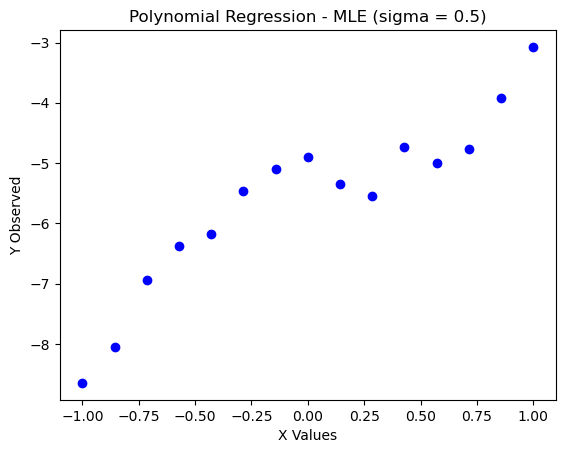

Best-fit parameters (MLE): [ 1.77860976 -1.83606859  1.35448679 -4.58485448]
Area estimation using Simpson's method: -10.406907344551154
Area estimation using Trapezoidal method: -10.459557190565356


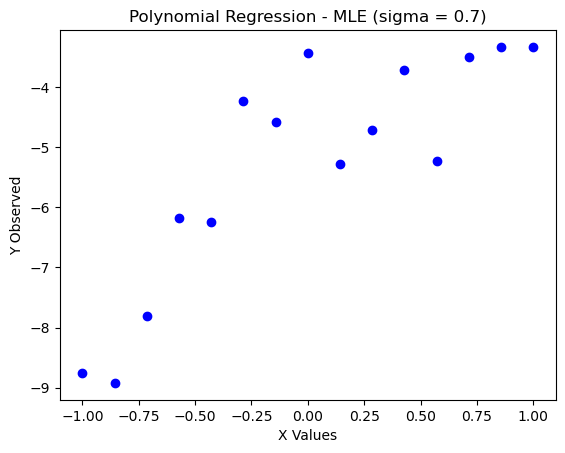

Best-fit parameters (MLE): [ 2.40463435 -0.06299629  0.70118703 -5.24812827]
Area estimation using Simpson's method: -10.241995335466715
Area estimation using Trapezoidal method: -10.504932426919298


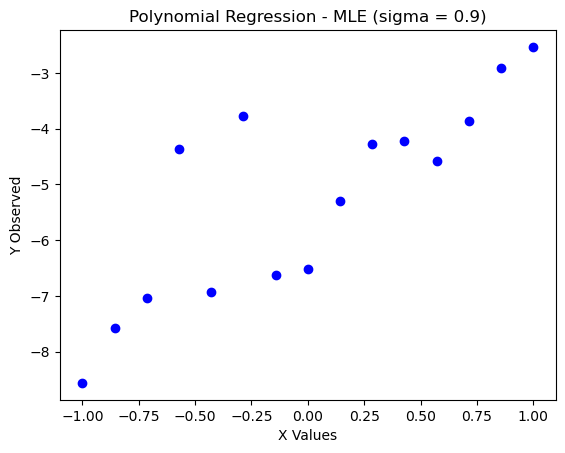

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_mle import PolynomialRegressionMLE
from scipy.integrate import simps
from scipy.integrate import trapz



## arrays to hold area
mle_simps = np.zeros(5)
mle_trapz = np.zeros(5)


# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    

    mle = PolynomialRegressionMLE(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(mle.x_values, mle.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - MLE (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # minimize MLe
    try:
        mle.minimize_mle()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing negative log likelihood for sigma = {sigma}: {e}")
    
    # Integration using Simpson's Rule
    mle_simps[i] = simps(mle.y_observed, mle.x_values)
    print(f"Area estimation using Simpson's method: {mle_simps[i]}")
    
    # Integration using Trapezoidal Rule
    mle_trapz[i] = trapz(mle.y_observed, mle.x_values)
    print(f"Area estimation using Trapezoidal method: {mle_trapz[i]}")

    # Show the plot inline
    plt.show()

## Comparing integration acuracy for Chi Squared and MLE

In [18]:
# Define constants
from tabulate import tabulate
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

data = [chi_sq_simps, chi_sq_trapz, mle_simps, mle_trapz]

row_labels = ['Chi-Squared Simpson', 'Chi-Squared Trapezoid', 'MLE Simpson', 'MLE Trapezoid']

head = np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)
formatted_head = [f"{sigma:.1f}" for sigma in head]


print(tabulate(data, headers = formatted_head, showindex=row_labels))
print()


differential_data = [chi_sq_simps-simps_true, chi_sq_trapz-trapz_true, mle_simps-simps_true, mle_trapz-trapz_true]
print(tabulate(differential_data, headers = formatted_head, showindex=row_labels))

print(f"Area under true polynomial (Trapezoidal Method): {trapz_true}")
print(f"Area under true polynomial (Simpsons Method): {simps_true}")
# for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
#     print(f"Sigma = {sigma:.1f}")
   
   
    

                            0.1       0.3       0.5       0.7       0.9
---------------------  --------  --------  --------  --------  --------
Chi-Squared Simpson    -10.6834  -10.7311  -11.0852  -10.9285  -10.969
Chi-Squared Trapezoid  -10.6456  -10.6786  -10.9653  -10.753   -11.2231
MLE Simpson            -10.7593  -10.4373  -11.1856  -10.4069  -10.242
MLE Trapezoid          -10.7582  -10.4859  -11.1689  -10.4596  -10.5049

                              0.1          0.3        0.5         0.7        0.9
---------------------  ----------  -----------  ---------  ----------  ---------
Chi-Squared Simpson    -0.0167368  -0.0644793   -0.418564  -0.261829   -0.30237
Chi-Squared Trapezoid   0.0278218  -0.00508469  -0.291817  -0.0795393  -0.54968
MLE Simpson            -0.0926729   0.229382    -0.518888   0.259759    0.424671
MLE Trapezoid          -0.0847071   0.18761     -0.495403   0.213912    0.168537
Area under true polynomial (Trapezoidal Method): -10.673469387755102
Area under true 